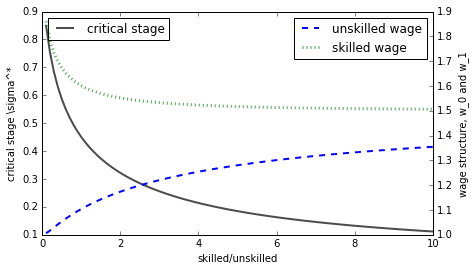

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound

#F=F(1)/F(0)
def lhs(sigma):
    temp1=1.5-(sigma+sigma**2/2)
    temp2=sigma*(1+sigma)**2
    return temp1/temp2
def cstage(F):
    def lhsminusrhs(sigma):
        return (lhs(sigma)-F)**2
    return fminbound(lhsminusrhs, 1e-6, 1)
def w_0(F):
    return cstage(F)*(1+F*(1+cstage(F)))
def w_1(F):
    return w_0(F)*(1+cstage(F))

FF=np.linspace(0.1, 10, 100)
SS=np.empty(100)
W0=np.empty(100)
W1=np.empty(100)
for i, F in enumerate(FF):
    SS[i]=cstage(F)
    W0[i]=w_0(F)
    W1[i]=w_1(F)

fig, ax=plt.subplots(figsize=(7, 4))
ax2=ax.twinx()
ax.plot(FF, SS, lw=2, alpha=0.7, color="black", label="critical stage")
ax2.plot(FF, W0, lw=2, alpha=3, linestyle="--", label="unskilled wage")
ax2.plot(FF, W1, lw=3, alpha=0.7, linestyle=":", label="skilled wage")
ax.set_xlabel("skilled/unskilled")
ax.set_ylabel("critical stage \sigma^*")
ax2.set_ylabel("wage structure, w_0 and w_1")
ax.legend(loc="upper left")
ax2.legend()
plt.show()

array([ 0.75324169])